<b>Name          : Kalyan Khatry     

University Id : 2058924



# Loading and Preparing the data

In [1]:
#Imporing libraries

#library for arrays, matrices, and mathematical function manipulation
import numpy as np      

#library for plots and diagrams
import matplotlib.pyplot as plt  

#library for opening, manipulating images
from PIL import Image                

In [2]:
#library to open an image file -Note: Image must be in the same diractory as the python file-
img = Image.open('kalyan.jpg')     

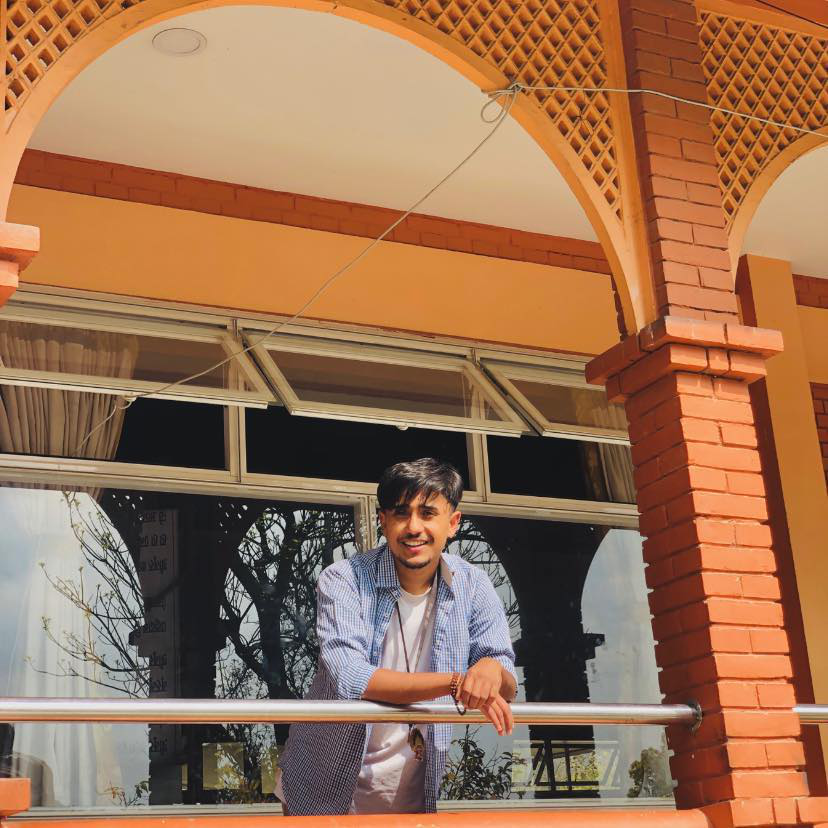

In [3]:
#uploaded image
img

In [4]:
#Converting RBG image into gray scale image
img = img.convert('L')   # 'L' is the luminance mode which is a gray scale representaion of the image

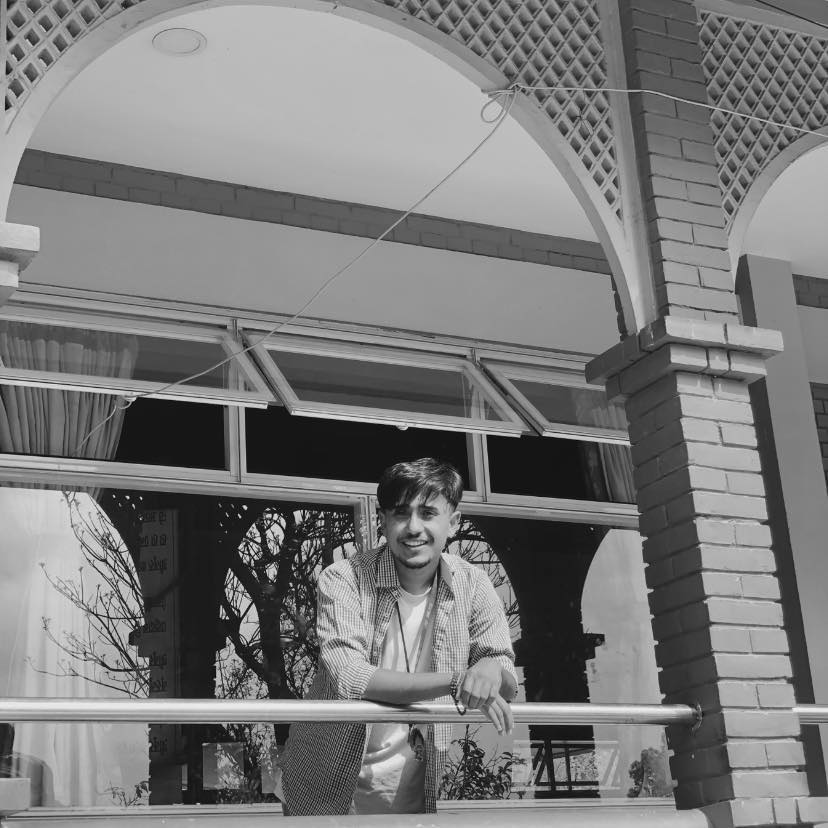

In [6]:
#Converted gray scale image
img 

In [6]:
#Converting the image file into numpy array
img = np.array(img)

In [8]:
#this gives the shape of the uploaded image. 
img.shape    #This states that, the image has 828 of rows and 828 of columns dimension/pixels

(828, 828)

# Standardizing/Scaling the data

In [58]:
#represents the average value of each pixels column wise
col_mean = np.mean(img, axis = 0)       

#represents the amount of variance in each values of pixels column wise
standard_dev = np.std(img, axis = 0)      

In [62]:
col_mean.shape 

(828,)

In [63]:
standard_dev.shape

(828,)

In [64]:
# performing standard scaling on each pixels
#the 'img' array is standardized using the formula for z-score normalization
img = ((img - col_mean) / standard_dev)   

Here, the mean of each pixel (column wise) is substraced from the original value of pixel and 
then it is divided by the standard deviation of the pixel. 
Now, the resulting array ('img') has zero mean and a unit variance (1 variance) in each pixel. 
This makes the input data(img) to be on the same scale.
This is how the standardizing or the scaling of the input data is performed.

# Calculating Covariance Matrix

The formula for the covariance matrix is given by,


$$Cov(X) = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^{T}(X_i - \bar{X})$$


In [72]:
# finds the covariance matrix using cov function of the matrix(img)
cov = np.cov(img, rowvar=False)

In [73]:
cov.shape

(828, 828)

# Egien Deponsition

In [74]:
#finds the eigen value and eigen vector of a matrix(cov) using .linalg.eigh function
vals, vects = np.linalg.eigh(cov)

Here, .eigh computes the eigen value and eigen vector of a symmetric matrix.The .eigh function has two arrays (vals, vects). 

The vals consists of eigen value of covariance matrix 'cov' in an ascending order.

Whereas, the vects contains the corresponding eigen vector arranged in columns.

In [16]:
#Eigan Value
vals.shape

(828,)

In [17]:
#Eigan Vector
vects.shape

(828, 828)

<b>Pairing eigen value with corresponding eigen vector

In [18]:
#each element is stored in a tupel,and tupel contains the eigen value and its corresponding eigen vector
pairs = [(np.abs(vals[i]), vects[:,i]) for i in range(len(vals))] 

Here the range function is used where the list loops through the indices of the vals array. Using np.abs function, it calculates the absolute value of the ith eigenvalue for each indes i. The eigen vector which is corresponding to vals is extracted from the eigen vector (vects) numpy by using (vects[:,i])

In [20]:
#sorting
pairs.sort(key=lambda x: x[0], reverse=True) 

In [22]:
#First five elements 
[i[0] for i in pairs][:5]

[233.84091417960883,
 126.28158853428191,
 68.39767413962952,
 53.28663631002524,
 42.78867253189603]

# Identifying Principal Components

In [75]:
total = np.sum(vals) 

#Calculates the percentage of variance 
#creates the list of sorted  percentage for each of the component

exp_var = [(i/total)*100 for i in sorted(vals, reverse=True)] 
#Calculates cumulative sum of the percentage of explained variance by each component
cum_exp_var = np.cumsum(exp_var)  

In [139]:
exp_var[:5]

[35.21762779688236,
 13.15857558085499,
 8.26339510009668,
 5.809671041185371,
 4.3618574315895495]

In [140]:
cum_exp_var[:5]

array([35.2176278 , 48.37620338, 56.63959848, 62.44926952, 66.81112695])

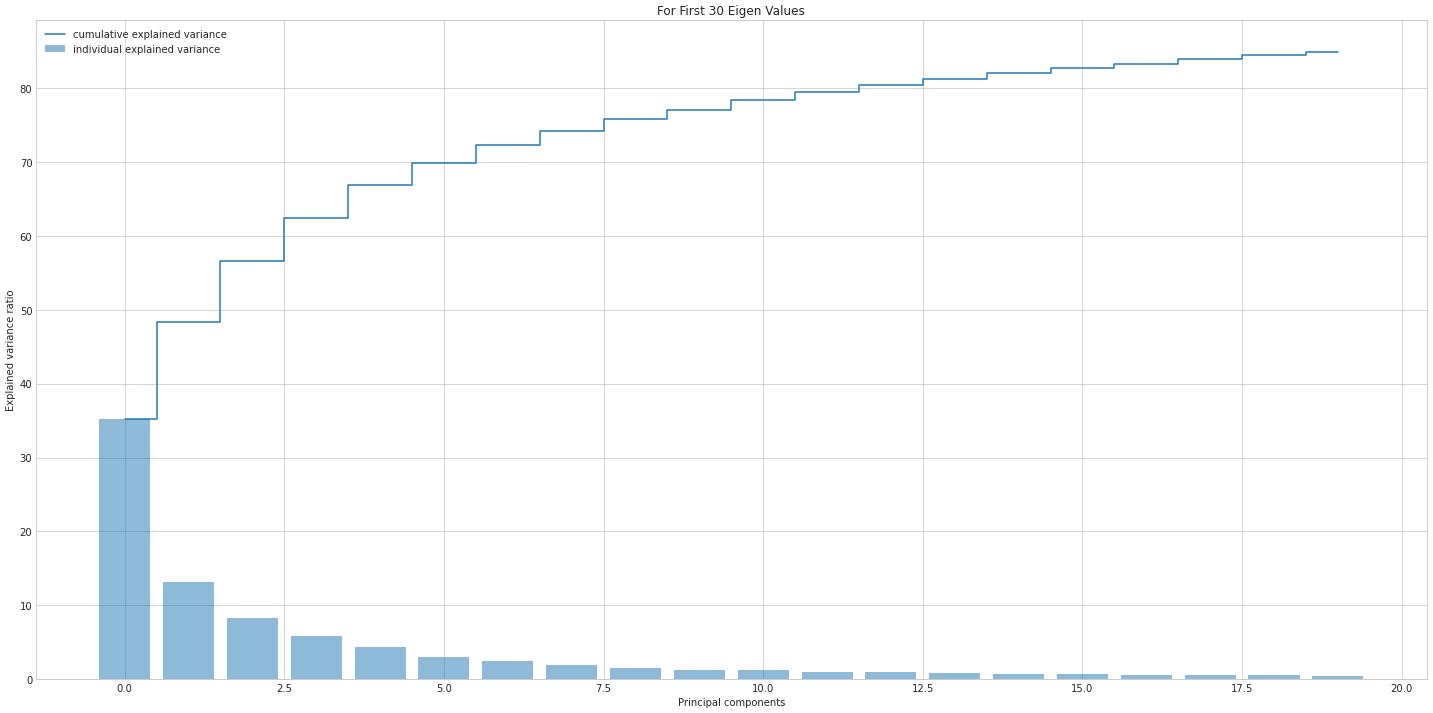

In [77]:
# plotting explained varaince:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 10))
    plt.bar(range(20), exp_var[:20], alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(20), cum_exp_var[:20], where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title("For First 30 Eigen Values")
    plt.tight_layout()

In [90]:
#creates a horizontal stack of arrays using the np.hstack() function and 
#returns first principle component from the tupel
matrix = np.hstack([(pairs[i][1]).reshape(828 ,1) for i in range(1)]) 

In [137]:
#creates a horizontal stack of arrays using np.hstack() function 
#and returns first seventy principle component from the tupel
matrix2 = np.hstack([(pairs[i][1]).reshape(828 ,1) for i in range(70)])

In [92]:
#creates horizontal stack of arrays using np.hstack() 
#and returns first two hundred seventy principle component from tupel
matrix3 = np.hstack([(pairs[i][1]).reshape(828 ,1) for i in range(270)])

In [93]:
#creates horizontal stack of arrays using np.hstack() 
#and returns last seven hundred fiftyeighht principle component from tupel
matrix4 = np.hstack([(pairs[i][1]).reshape(828 ,1) for i in range(70,828)])

In [94]:
matrix.shape

(828, 1)

In [95]:
#sums up the first explained variance
sum(exp_var[:1])

35.21762779688236

In [96]:
#sums up the first seventy explained variance
sum(exp_var[:70])

94.34470835858626

In [97]:
#sums up the two hundred seventy explained variance
sum(exp_var[:270])

99.41853496210456

In [102]:
#sums up the last sevenhundred fiftyeight explained variance
sum(exp_var[270:])

0.581465037895403

# Reconstructing of the image

<b> 1. Reconstruction of the image based on 'one' principal component


img and matrix are NumPy arrays representing image and the principal 
components respectively, projected_matrix is a 1-dimensional NumPy array that contains the projections of the image onto each of the principal components.

In [111]:
#Dot product of img and matrix which is stored in projected_matrix
projected_matrix = np.dot(img, matrix);projected_matrix.shape

(828, 1)

The projection of image onto the the primary components is represented by each row of the projected_matrix by 
multiplying it by the matrix.T successfully transforms these projection into the original pixel space.

In [112]:
#performs reconstruction of an image from its projected matrix using dot product
reconstructed_image = np.dot(projected_matrix, matrix.T)

In [113]:
reconstructed_image.shape

(828, 828)

In [114]:
#Scaling the reconstructed image back to its original pixel
reconstructed_image = ((reconstructed_image * standard_dev) + col_mean)

In [115]:
reconstructed_image

array([[0.09613944, 0.11567183, 0.11815373, ..., 0.16837259, 0.16995445,
        0.1597518 ],
       [0.09983611, 0.12011954, 0.12269687, ..., 0.17484669, 0.17648938,
        0.16589443],
       [0.10335001, 0.12434735, 0.1270154 , ..., 0.18100073, 0.18270123,
        0.17173337],
       ...,
       [0.38379242, 0.46176649, 0.47167432, ..., 0.67214997, 0.67846483,
        0.63773545],
       [0.40634793, 0.48890454, 0.49939466, ..., 0.71165227, 0.71833825,
        0.67521521],
       [0.42284503, 0.50875331, 0.51966932, ..., 0.74054426, 0.74750169,
        0.70262791]])

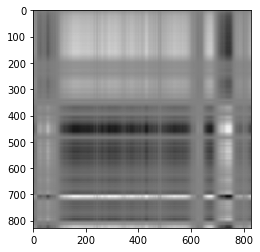

In [116]:
plt.imshow(reconstructed_image, cmap = 'gray')
plt.show()

<b>2. Reconstruction of the image based on 'seventy' principal component

In [123]:
#Dot product of img and matrix which is stored in projected_matrix
projected_matrix2 = np.dot(img, matrix2);projected_matrix2.shape

(828, 70)

In [118]:
#performs a reconstruction of an image from its projected matrix using dot product
reconstructed_image2 = np.dot(projected_matrix2, matrix2.T)

In [119]:
reconstructed_image2.shape

(828, 828)

In [120]:
#Scaling the reconstructed image back to its original pixel
reconstructed_image2 = ((reconstructed_image2 * standard_dev) + col_mean)

In [121]:
reconstructed_image2

array([[-0.91181813, -0.57853132, -0.46695771, ..., -0.28790247,
        -0.28359557, -0.35412059],
       [-1.06847416, -0.64943233, -0.49725734, ..., -0.50676   ,
        -0.51972015, -0.53716971],
       [-1.16097545, -0.64479567, -0.45263165, ..., -0.48610702,
        -0.51899813, -0.50667277],
       ...,
       [-0.49832095, -0.14030428,  0.01533802, ...,  1.31095687,
         1.20757209,  1.02732585],
       [-0.45988939, -0.1227151 ,  0.03269837, ...,  1.45183338,
         1.39128697,  1.20771995],
       [-0.32580256,  0.03000082,  0.18222686, ...,  1.44211805,
         1.33367256,  1.15374042]])

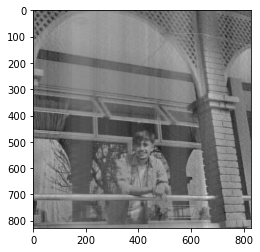

In [122]:
plt.imshow(reconstructed_image2, cmap = 'gray')
plt.show()

<b>3. Reconstruction of the image based on 'two hundred seventy' principal component

In [124]:
#Dot product of img and matrix which is stored in projected_matrix
projected_matrix3 = np.dot(img, matrix3);projected_matrix3.shape

(828, 270)

In [125]:
#performs a reconstruction of an image from its projected matrix using dot product
reconstructed_image3 = np.dot(projected_matrix3, matrix3.T)

In [126]:
reconstructed_image3.shape

(828, 828)

In [127]:
#Scaling the reconstructed image back to its original pixel
reconstructed_image3 = ((reconstructed_image3 * standard_dev) + col_mean)

In [128]:
reconstructed_image3

array([[-1.26560988, -0.32817566, -0.17012561, ...,  0.05247548,
         0.44685965,  0.65377791],
       [-1.09945575, -0.28657049, -0.11989712, ..., -0.67995637,
        -0.63786273, -0.56248493],
       [-0.80829299, -0.161878  , -0.14057951, ..., -0.66966321,
        -0.85394656, -0.89632734],
       ...,
       [-0.89583956, -0.44082094, -0.10028123, ...,  1.20937375,
         1.19160751,  1.12495483],
       [-0.91141332, -0.49296793, -0.1128971 , ...,  1.26053832,
         1.2531349 ,  1.23962671],
       [-0.79801208, -0.36551687,  0.00358735, ...,  1.28406628,
         1.27417701,  1.28216933]])

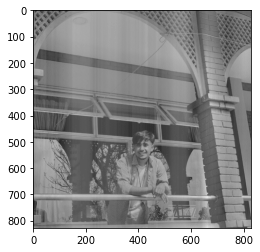

In [129]:
plt.imshow(reconstructed_image3, cmap = 'gray')
plt.show()

<b>4. Reconstruction of the image based on remaining 'sevenhundred fiftyeight' principal component

In [130]:
#Dot product of img and matrix which is stored in projected_matrix
projected_matrix4 = np.dot(img, matrix4);projected_matrix4.shape

(828, 758)

In [131]:
#performs a reconstruction of an image from its projected matrix using dot product
reconstructed_image4 = np.dot(projected_matrix4, matrix4.T)

In [132]:
reconstructed_image4.shape

(828, 828)

In [133]:
#Scaling the reconstructed image back to its original pixel
reconstructed_image4 = ((reconstructed_image4 * standard_dev) + col_mean)

In [134]:
reconstructed_image4

array([[-0.40147911,  0.18595118,  0.24964036, ...,  0.22154663,
         0.70930574,  1.1314519 ],
       [-0.1403227 ,  0.3638913 ,  0.36670973, ..., -0.24276597,
        -0.16053837, -0.13395173],
       [ 0.07757906,  0.46629374,  0.38716136, ..., -0.07948852,
        -0.21392557, -0.37137049],
       ...,
       [-0.58507545, -0.48776189, -0.05911588, ..., -0.08979981,
         0.00811573,  0.1638491 ],
       [-0.58170685, -0.56957454, -0.22832329, ..., -0.20440055,
        -0.14926656,  0.00932022],
       [-0.5067929 , -0.63665917, -0.37785177, ..., -0.19468522,
        -0.09165215,  0.06329976]])

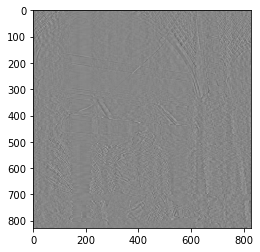

In [135]:
plt.imshow(reconstructed_image4, cmap = 'gray')
plt.show()

# Conclusion

In this experiment, it is found that the single component of principle component could only produce 35.217 explained variance. When the principle component was placed to 70 it cold produce 94.34 explained variance. And gradually when the principle component was increased to 270, it could produce 99.41 explained variance. And finally, when the other remaining principle component i.e. 758 was kept, it could only produce .41 explained variance.

So what we can observe from this experiment is that, Principle Component Analysis helps to compress the image without loosing its features. Also, 270 principle components retrieve the maximum information . In other word, 270 principle component retains 99.41% of the features of the image. 

We could also see that the remaining of the 758 princpile component were not much of a help in retaining the features of the picture.

<b>Therefore, we can conclude that Principle Component Analysis algorithm reduces the dimension with minimum loss in the information by only using few explained variance.
    
    